In [1]:
#importing standard libraries.  More esoteric libraries
#will be imported down below as needed

import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

import re

In [2]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use("ggplot")

In [3]:
#import data set as dataframe and use smaller subset
#for simple modeling purposes
df=pd.read_csv("data/rotten_tomatoes_reviews.csv")
df_quick = df[:10000]
df_quick


Freshness                                             Review
0             1   Manakamana doesn't answer any questions, yet ...
1             1   Wilfully offensive and powered by a chest-thu...
2             0   It would be difficult to imagine material mor...
3             0   Despite the gusto its star brings to the role...
4             0   If there was a good idea at the core of this ...
5             0   Gleeson goes the Hallmark Channel route, dama...
6             1   It was the height of satire in 1976: dark as ...
7             0   Everyone in "The Comedian" deserves a better ...
8             0   Actor encourages grumpy Christians to embrace...
9             1          Slight, contained, but ineffably soulful.
10            1   Bell's debut feature addresses its subject wi...
11            1   ... except for its shamelessly (and irresisti...
12            0   This is not one for the uninitiated. It's als...
13            1   Son of Saul employs the formal mechanics of f...
14            0   It isn't thrilling. Fox can't act. The backch...
15            0   Hiddleston and Swinton are lovely to watch, b...
16            1   Yossi is a stronger film than its predecessor...
17            1   I feel like a Sparkle Baby just puked rainbow...
18            0                              Long, unfocused film.
19            1   Kubo and the Two Strings is better than immer...
20            0   Easy to enjoy, if you're at all susceptible t...
21            1   An extraordinary blast from the past, X-Men: ...
22            1   Mostly lightweight, but the most interesting ...
23            1   Drawn, per a disclaimer, from period accounts...
24            1   ... hones its dramatic elements to emotional ...
25            0   What seemed like a decent idea - a fourth and...
26            0   Free Birds is unappealingly staged and paced ...
27            0   A joyless, misanthropic 105 minutes worth of ...
28            0   This one, directed by John Glen, just follows...
29            1   The movie is purely visceral, generating adre...
...         ...                                                ...
9970          0   There's nothing worthwhile about a single mom...
9971          0   The story stagnates with the null drawing of ...
9972          1   Writer/director Paul Thomas Anderson's period...
9973          0   The only reasons to see this structurally mes...
9974          0   I've never seen Kristen Bell more unlikable a...
9975          0   Mann seems undecided about what he wants Enem...
9976          0   Gigi is dressed to kill, but if all the Frenc...
9977          1   Tells a specifically Chinese story, and yet i...
9978          0   Man of Steel starts feeling like just another...
9979          0   The sex was good but the delirious lesbian mu...
9980          1   There is so much attention to detail, it's ge...
9981          1   While none of it's anything particularly spec...
9982          1   Hayek and Lithgow are outstanding in their le...
9983          0   [VIDEO ESSAY] Indolent pacing combines with t...
9984          0   The least fun of the three: overworked and un...
9985          1   Extremely original masterpiece in British cinema
9986          1   The pugnacious John C. is gifted and knows no...
9987          1   Saoirse Ronan plays this interior drama with ...
9988          1   Karolina Gruszka is very good as Curie, conve...
9989          1   An altogether astonishing film, not in the le...
9990          0   Scott's film can't quite decide whether it's ...
9991          1   More than just a not-so-instant replay...even...
9992          1   Screenwriter Rebecca Frayn's full feature deb...
9993          0   The cast adds little. Columbus Short, a dance...
9994          1   But the film's fascination lies less in its p...
9995          0   Can a video game turn a movie into a hit, man...
9996          0   If you swallow this type of thing no matter w...
9997          1   It all escalates into an arch, know

In [4]:
#using regexp notation to get rid of numbers in reviews

df_quick["Review"] = df_quick["Review"].str.replace(r'([^a-zA-Z\s]+?)',"")
df_quick.Review[0]
# r"\d+"

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


' Manakamana doesnt answer any questions yet makes its point Nepal like the rest of our planet is a picturesque but far from peaceable kingdom'

In [5]:
#create a model to make a word counts matrix from the docs
#This model will lowercase words, stip accents, take out english stop words, and 
# take out obscure words, and possibly words that appear to often

count_vect = CountVectorizer(lowercase=True, tokenizer=None, strip_accents= "ascii", stop_words='english',
                             analyzer='word', max_df=1.0, min_df=1,
                             max_features=100000)
X_train_counts = count_vect.fit_transform(df_quick.Review.values)

In [6]:
# These are the words in our vocabulary to serve as 
# feature names
feature_names = count_vect.get_feature_names()
feature_names

['aa',
 'aahing',
 'aardman',
 'aardmans',
 'aaron',
 'ab',
 'abandon',
 'abandoned',
 'abandonment',
 'abandons',
 'abbas',
 'abbasi',
 'abbie',
 'abdellah',
 'abductees',
 'abdul',
 'abduls',
 'abel',
 'abercrombie',
 'abide',
 'abiding',
 'abilities',
 'ability',
 'abject',
 'abjectly',
 'able',
 'ably',
 'aboard',
 'abolishment',
 'abominable',
 'abondamment',
 'aboriginal',
 'abortion',
 'abortions',
 'abound',
 'aboveaverage',
 'abracadabra',
 'abraham',
 'abrahamson',
 'abrahamsons',
 'abrams',
 'abrasive',
 'abridgment',
 'abroad',
 'abrupt',
 'abruptly',
 'abruptness',
 'abs',
 'absence',
 'absences',
 'absent',
 'absolute',
 'absolutely',
 'absolving',
 'absorb',
 'absorbing',
 'absorbs',
 'absorptive',
 'abstemious',
 'abstract',
 'abstraction',
 'abstractly',
 'absurd',
 'absurdist',
 'absurdities',
 'absurdity',
 'absurdly',
 'absurdlyoverrated',
 'abu',
 'abundance',
 'abundant',
 'aburrida',
 'aburrimiento',
 'abuse',
 'abused',
 'abuses',
 'abusive',
 'abysmal',
 'abysm

In [7]:
#create bag of words dictionary to get lookup table
# for words in matrix
for key in sorted(count_vect.vocabulary_.keys()):
    print("{0:<20s} {1}".format(key, count_vect.vocabulary_[key]))

aa                   0
aahing               1
aardman              2
aardmans             3
aaron                4
ab                   5
abandon              6
abandoned            7
abandonment          8
abandons             9
abbas                10
abbasi               11
abbie                12
abdellah             13
abductees            14
abdul                15
abduls               16
abel                 17
abercrombie          18
abide                19
abiding              20
abilities            21
ability              22
abject               23
abjectly             24
able                 25
ably                 26
aboard               27
abolishment          28
abominable           29
abondamment          30
aboriginal           31
abortion             32
abortions            33
abound               34
aboveaverage         35
abracadabra          36
abraham              37
abrahamson           38
abrahamsons          39
abrams               40
abrasive             41
ab

blip                 1944
bliss                1945
blistering           1946
blisteringly         1947
blithe               1948
blitz                1949
blitzs               1950
bloat                1951
bloated              1952
blobby               1953
block                1954
blockbuster          1955
blockbusters         1956
blockbustery         1957
blocked              1958
blockers             1959
blocking             1960
blocks               1961
blomkamp             1962
blomkamps            1963
blond                1964
blonde               1965
blondes              1966
blood                1967
bloodbath            1968
bloodbaths           1969
bloodboiling         1970
blooddrenched        1971
blooded              1972
bloodily             1973
bloodless            1974
bloodlust            1975
bloodred             1976
bloodshed            1977
bloodsoaked          1978
bloodstream          1979
bloodsucking         1980
bloodthirsty         1981
bloody      

consults             3943
consume              3944
consumed             3945
consumerism          3946
consumes             3947
consuming            3948
consummately         3949
consumption          3950
contact              3951
contado              3952
contagion            3953
contagious           3954
contain              3955
contained            3956
container            3957
containing           3958
containment          3959
contains             3960
contamination        3961
contemplate          3962
contemplation        3963
contemplations       3964
contemplative        3965
contempo             3966
contemporaries       3967
contemporary         3968
contempt             3969
contemptuous         3970
contemptuously       3971
contender            3972
content              3973
contentious          3974
contentiousness      3975
contentment          3976
contents             3977
contest              3978
contestants          3979
contests             3980
context     

eluded               6136
elusive              6137
elvira               6138
elviss               6139
elysian              6140
elysium              6141
em                   6142
emanates             6143
emanating            6144
embalmed             6145
embargo              6146
embarked             6147
embarrass            6148
embarrassing         6149
embarrassingly       6150
embarrassment        6151
embarrassments       6152
embeds               6153
embellishment        6154
emblematic           6155
embodied             6156
embodies             6157
embodiment           6158
embody               6159
embrace              6160
embraced             6161
embraces             6162
embracing            6163
emelie               6164
emerge               6165
emerged              6166
emergence            6167
emerges              6168
emerging             6169
emile                6170
emily                6171
eminem               6172
eminently            6173
emma        

gamewinning          7942
gamma                7943
gams                 7944
gamut                7945
gamze                7946
gandolfini           7947
gandolfinis          7948
gang                 7949
gangland             7950
gangs                7951
gangsta              7952
gangster             7953
gap                  7954
gapejawed            7955
gaping               7956
gaps                 7957
garantem             7958
garb                 7959
garbage              7960
garca                7961
garcia               7962
garcias              7963
garden               7964
gardener             7965
gardening            7966
gardens              7967
gareth               7968
garfield             7969
garish               7970
garner               7971
garners              7972
garofalo             7973
garrel               7974
garrones             7975
garrulous            7976
gary                 7977
gas                  7978
gaseous              7979
gasket      

industrys            9942
indy                 9943
ineffably            9944
ineffectual          9945
ineffectually        9946
inelegant            9947
inept                9948
ineptitude           9949
ineptly              9950
ineptness            9951
inequality           9952
inequitable          9953
inert                9954
inertia              9955
inertness            9956
inescapable          9957
inevitability        9958
inevitable           9959
inevitably           9960
inexcusably          9961
inexhaustible        9962
inexperienced        9963
inexplicable         9964
inexplicably         9965
inexpressive         9966
infamous             9967
infant               9968
infantile            9969
infantilepolitically 9970
infantilizes         9971
infatuated           9972
infatuation          9973
infected             9974
infecteds            9975
infectious           9976
infectiously         9977
inferior             9978
infernal             9979
inferno     

maple                11941
mar                  11942
mara                 11943
marathon             11944
marauding            11945
marc                 11946
marcel               11947
march                11948
marched              11949
marching             11950
marco                11951
mardik               11952
mare                 11953
margaret             11954
margin               11955
marginal             11956
marginally           11957
margins              11958
margo                11959
margot               11960
marguerite           11961
maria                11962
mariane              11963
marie                11964
marigold             11965
marine               11966
marines              11967
marion               11968
marionettes          11969
marital              11970
mark                 11971
marked               11972
markers              11973
market               11974
marketed             11975
marketing            11976
marking              11977
m

overlook             13901
overlooked           13902
overlooks            13903
overly               13904
overlycomplicated    13905
overlycrafted        13906
overlyobvious        13907
overpaid             13908
overplayed           13909
overplays            13910
overpolished         13911
overpowering         13912
overpowers           13913
overpraise           13914
overpriced           13915
overproduced         13916
overqualified        13917
overrated            13918
overreliance         13919
overreliant          13920
overriding           13921
overrules            13922
overrun              13923
oversaturated        13924
overseas             13925
overshadowed         13926
overshadows          13927
overshooting         13928
oversights           13929
oversimplified       13930
overstate            13931
overstated           13932
overstatement        13933
overstates           13934
overstating          13935
overstay             13936
overstays            13937
o

pugiliststunt        15440
pugnacious           15441
puk                  15442
puked                15443
pull                 15444
pulled               15445
pulling              15446
pulls                15447
pullyou              15448
pulp                 15449
pulpy                15450
pulsatingly          15451
pulse                15452
pulsepounding        15453
pulses               15454
pulverizing          15455
pummels              15456
pump                 15457
pumped               15458
pumpkin              15459
pumps                15460
pun                  15461
punch                15462
punchdrunk           15463
punched              15464
punches              15465
punching             15466
punchline            15467
punchlines           15468
punchups             15469
punchy               15470
punctuated           15471
punctuates           15472
pundit               15473
pungent              15474
puniness             15475
punish               15476
p

silver               17897
silverman            17898
silverstein          17899
simien               17900
similar              17901
similarities         17902
similarly            17903
simmering            17904
simmers              17905
simmondss            17906
simon                17907
simple               17908
simpleminded         17909
simpler              17910
simplicity           17911
simplified           17912
simplify             17913
simplistic           17914
simply               17915
simpson              17916
simpsons             17917
simsdennett          17918
simulating           17919
simulations          17920
simultaneously       17921
sin                  17922
sincerity            17923
sincerityabsurdly    17924
sinews               17925
sinful               17926
sing                 17927
singalong            17928
singer               17929
singeractress        17930
singersongwriterrock 17931
singing              17932
single               17933
s

surprisingly         19439
surreal              19440
surrealism           19441
surrender            19442
surrendered          19443
surrogate            19444
surrounded           19445
surrounding          19446
surroundings         19447
surrounds            19448
surveillance         19449
survey               19450
surveying            19451
survival             19452
survivalist          19453
survivalmovie        19454
survive              19455
survived             19456
survives             19457
survivor             19458
survivors            19459
sus                  19460
susan                19461
susceptible          19462
suschitzkys          19463
sushi                19464
susi                 19465
susie                19466
suspect              19467
suspects             19468
suspend              19469
suspended            19470
suspends             19471
suspense             19472
suspensefree         19473
suspenseful          19474
suspensesaldana      19475
s

wild                 21939
wilde                21940
wilder               21941
wilderness           21942
wilderpeople         21943
wilders              21944
wildes               21945
wildlife             21946
wildly               21947
wilds                21948
wile                 21949
wilfully             21950
wilkinson            21951
willard              21952
willful              21953
willfully            21954
william              21955
williams             21956
willie               21957
willing              21958
willingly            21959
willingness          21960
willis               21961
williss              21962
willtheyorwontthey   21963
wilson               21964
wilts                21965
wily                 21966
wim                  21967
wimbledon            21968
wimper               21969
wimpy                21970
win                  21971
wince                21972
winceinducing        21973
winchester           21974
wind                 21975
w

In [8]:
count_vect.vocabulary_.keys()

dict_keys(['manakamana', 'doesnt', 'answer', 'questions', 'makes', 'point', 'nepal', 'like', 'rest', 'planet', 'picturesque', 'far', 'peaceable', 'kingdom', 'wilfully', 'offensive', 'powered', 'chestthumping', 'machismo', 'good', 'clean', 'fun', 'difficult', 'imagine', 'material', 'wrong', 'spade', 'lost', 'despite', 'gusto', 'star', 'brings', 'role', 'hard', 'ride', 'shotgun', 'hectors', 'voyage', 'discovery', 'idea', 'core', 'film', 'buried', 'unsightly', 'pile', 'flatulence', 'jokes', 'dogrelated', 'bad', 'puns', 'ridiculous', 'serial', 'arson', 'plot', 'gleeson', 'goes', 'hallmark', 'channel', 'route', 'damaging', 'intermittently', 'curious', 'entry', 'time', 'travel', 'subgenre', 'height', 'satire', 'dark', 'hell', 'patently', 'absurd', 'surely', 'close', 'objective', 'reality', 'surpassed', 'jerry', 'springer', 'era', 'comedian', 'deserves', 'better', 'movie', 'actor', 'encourages', 'grumpy', 'christians', 'embrace', 'season', 'slight', 'contained', 'ineffably', 'soulful', 'bells

In [9]:
#check to see if I can look up a word from count vect
# matrix which is in a particular document. Yes!
type(count_vect.vocabulary_)
for key in count_vect.vocabulary_.keys():
    if count_vect.vocabulary_[key]==2323:
        print(key)


bridget


In [10]:
# stop words currently in "english". Could add to this 
# list later.
count_vect.get_stop_words()

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [11]:
#Convert from sparse array to numpy array
X_train_counts
X_train_counts_arr = X_train_counts.toarray()
X_train_counts_arr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [12]:
# getting indices of features in matrix for doc1
type(X_train_counts_arr)
ind = X_train_counts[0].nonzero()
ind[1]

array([10849, 14259,  6968, 14539, 14669, 16341, 11378, 13139, 14784,
       11843, 15581,   751,  5530, 11881], dtype=int32)

In [13]:
# showing words in doc 1 that are represented in counts matrix
type(count_vect.vocabulary_)
for key in count_vect.vocabulary_.keys():
    if count_vect.vocabulary_[key] in ind[1]:
        print(key)

manakamana
doesnt
answer
questions
makes
point
nepal
like
rest
planet
picturesque
far
peaceable
kingdom


 do I want to stem or lemmatize?
 much adieu about nothing!!!  However, I do want to take out the numbers...they are driving me crazy....regex to the rescue. Also, why doesn't peace show up in doc 1?

In [14]:
from nltk.tokenize import word_tokenize, wordpunct_tokenize, RegexpTokenizer

In [15]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

In [16]:
# 1. Create a set of documents.
corpus = [' '.join(df_quick['Review']).lower() for row in df_quick]
print(corpus)

[' manakamana doesnt answer any questions yet makes its point nepal like the rest of our planet is a picturesque but far from peaceable kingdom  wilfully offensive and powered by a chestthumping machismo but its good clean fun  it would be difficult to imagine material more wrong for spade than lost  found  despite the gusto its star brings to the role its hard to ride shotgun on hectors voyage of discovery  if there was a good idea at the core of this film its been buried in an unsightly pile of flatulence jokes dogrelated bad puns and a ridiculous serial arson plot  gleeson goes the hallmark channel route damaging an intermittently curious entry in the time travel subgenre  it was the height of satire in  dark as hell but patently absurd and surely nowhere close to objective reality objective reality surpassed it somewhere in the jerry springer era  everyone in the comedian deserves a better movie than the comedian  actor encourages grumpy christians to embrace the season  slight con

In [17]:
df_corpus = df_quick["Review"].str.replace(r'([^a-zA-Z\s]+?)',"")
bag_of_words = " ".join(df_corpus)
bag_of_words.lower()
df_corpus =df_corpus.str.lower()

In [18]:
# 2. Create a set of tokenized documents.
docs_tokenized = [word_tokenize(content) for content in df_corpus]
docs_tokenized


[['manakamana',
  'doesnt',
  'answer',
  'any',
  'questions',
  'yet',
  'makes',
  'its',
  'point',
  'nepal',
  'like',
  'the',
  'rest',
  'of',
  'our',
  'planet',
  'is',
  'a',
  'picturesque',
  'but',
  'far',
  'from',
  'peaceable',
  'kingdom'],
 ['wilfully',
  'offensive',
  'and',
  'powered',
  'by',
  'a',
  'chestthumping',
  'machismo',
  'but',
  'its',
  'good',
  'clean',
  'fun'],
 ['it',
  'would',
  'be',
  'difficult',
  'to',
  'imagine',
  'material',
  'more',
  'wrong',
  'for',
  'spade',
  'than',
  'lost',
  'found'],
 ['despite',
  'the',
  'gusto',
  'its',
  'star',
  'brings',
  'to',
  'the',
  'role',
  'its',
  'hard',
  'to',
  'ride',
  'shotgun',
  'on',
  'hectors',
  'voyage',
  'of',
  'discovery'],
 ['if',
  'there',
  'was',
  'a',
  'good',
  'idea',
  'at',
  'the',
  'core',
  'of',
  'this',
  'film',
  'its',
  'been',
  'buried',
  'in',
  'an',
  'unsightly',
  'pile',
  'of',
  'flatulence',
  'jokes',
  'dogrelated',
  'bad',


In [19]:
# 3. Strip out stop words from each tokenized document.
stop = set(stopwords.words('english'))
docs_stop = [[word for word in words if word not in stop] for words in docs_tokenized]
docs_stop

[['manakamana',
  'doesnt',
  'answer',
  'questions',
  'yet',
  'makes',
  'point',
  'nepal',
  'like',
  'rest',
  'planet',
  'picturesque',
  'far',
  'peaceable',
  'kingdom'],
 ['wilfully',
  'offensive',
  'powered',
  'chestthumping',
  'machismo',
  'good',
  'clean',
  'fun'],
 ['would',
  'difficult',
  'imagine',
  'material',
  'wrong',
  'spade',
  'lost',
  'found'],
 ['despite',
  'gusto',
  'star',
  'brings',
  'role',
  'hard',
  'ride',
  'shotgun',
  'hectors',
  'voyage',
  'discovery'],
 ['good',
  'idea',
  'core',
  'film',
  'buried',
  'unsightly',
  'pile',
  'flatulence',
  'jokes',
  'dogrelated',
  'bad',
  'puns',
  'ridiculous',
  'serial',
  'arson',
  'plot'],
 ['gleeson',
  'goes',
  'hallmark',
  'channel',
  'route',
  'damaging',
  'intermittently',
  'curious',
  'entry',
  'time',
  'travel',
  'subgenre'],
 ['height',
  'satire',
  'dark',
  'hell',
  'patently',
  'absurd',
  'surely',
  'nowhere',
  'close',
  'objective',
  'reality',
  'o

In [20]:
# Stemming / Lemmatization

# 1. Stem using both stemmers and the lemmatizer
porter = PorterStemmer()
snowball = SnowballStemmer('english')
wordnet = WordNetLemmatizer()
docs_porter = [[porter.stem(word) for word in words] for words in docs_stop]
docs_snowball = [[snowball.stem(word) for word in words] for words in docs_stop]
docs_wordnet = [[wordnet.lemmatize(word) for word in words] for words in docs_stop]
docs_wordnet


[['manakamana',
  'doesnt',
  'answer',
  'question',
  'yet',
  'make',
  'point',
  'nepal',
  'like',
  'rest',
  'planet',
  'picturesque',
  'far',
  'peaceable',
  'kingdom'],
 ['wilfully',
  'offensive',
  'powered',
  'chestthumping',
  'machismo',
  'good',
  'clean',
  'fun'],
 ['would',
  'difficult',
  'imagine',
  'material',
  'wrong',
  'spade',
  'lost',
  'found'],
 ['despite',
  'gusto',
  'star',
  'brings',
  'role',
  'hard',
  'ride',
  'shotgun',
  'hector',
  'voyage',
  'discovery'],
 ['good',
  'idea',
  'core',
  'film',
  'buried',
  'unsightly',
  'pile',
  'flatulence',
  'joke',
  'dogrelated',
  'bad',
  'pun',
  'ridiculous',
  'serial',
  'arson',
  'plot'],
 ['gleeson',
  'go',
  'hallmark',
  'channel',
  'route',
  'damaging',
  'intermittently',
  'curious',
  'entry',
  'time',
  'travel',
  'subgenre'],
 ['height',
  'satire',
  'dark',
  'hell',
  'patently',
  'absurd',
  'surely',
  'nowhere',
  'close',
  'objective',
  'reality',
  'objectiv

In [21]:
docs_wordnet
new_element =[]
for element in docs_wordnet:
    test = " ".join(element)
    new_element.append(test) 
type(new_element)
new_series = pd.Series(new_element)
new_series
col = "text"
new_df = pd.DataFrame(new_series,columns = [col])
new_df

text
0     manakamana doesnt answer question yet make poi...
1     wilfully offensive powered chestthumping machi...
2     would difficult imagine material wrong spade l...
3     despite gusto star brings role hard ride shotg...
4     good idea core film buried unsightly pile flat...
5     gleeson go hallmark channel route damaging int...
6     height satire dark hell patently absurd surely...
7      everyone comedian deserves better movie comedian
8      actor encourages grumpy christian embrace season
9                    slight contained ineffably soulful
10    bell debut feature address subject humor intel...
11    except shamelessly irresistibly zingy music sc...
12    one uninitiated also one people like action th...
13    son saul employ formal mechanic filmmaking tur...
14    isnt thrilling fox cant act backchat filthy funny
15            hiddleston swinton lovely watch need chew
16    yossi stronger film predecessor deeply felt le...
17    feel like sparkle baby puked rainbowcolored du...
18                                  long unfocused film
19    kubo two string better immersive absorptive pu...
20    easy enjoy youre susceptible sort thing leaf n...
21    extraordinary blast past xmen first class go o...
22    mostly lightweight interesting part movie jami...
23    drawn per disclaimer period account strange ph...
24    hone dramatic element emotional effect rather ...
25    seemed like decent idea fourth final stroll am...
26    free bird unappealingly staged paced uneven sl...
27    joyless misanthropic minute worth comedy rate ...
28    one directed john glen follows number plodding...
29    movie purely visceral generating adrenaline al...
...                                                 ...
9970  there nothing worthwhile single moment even pr...
9971  story stagnates null drawing character cadence...
9972  writerdirector paul thomas anderson period pie...
9973  reason see structurally messy poorly directed ...
9974  ive never seen kristen bell unlikable kelsey g...
9975  mann seems undecided want enemy accomplish try...
9976  gigi dressed kill french finery impress custom...
9977  tell specifically chinese story yet completely...
9978  man steel start feeling like another generic s...
9979  sex good delirious lesbian mumblecore didnt le...
9980  much attention detail genuinely fun look imagi...
9981  none anything particularly spectacular memorab...
9982  hayek lithgow outstanding lead role spiritual ...
9983  video essay indolent pacing combine tonedeaf d...
9984              least fun three overworked uninspired
9985      extremely original masterpiece british cinema
9986  pugnacious john c gifted know bound walking ha...
9987  saoirse ronan play interior drama intelligence...
9988  karolina gruszka good curie conveying mix inte...
9989  altogether astonishing film least winter bone ...
9990  scott film cant quite decide whether fully beh...
9991  notsoinstant replayeven viewer regularly skip ...
9992  screenwriter rebecca frayns full feature debut...
9993  cast add little columbus short dancerturnedact...
9994  film fascination lie le portrait grievously fl...
9995  video game turn movie hit man maybe doesnt mea...
9996  swallow type thing matter proceed without caut...
9997  escalates arch knowing throwback horrorthrille...
9998                  witless even slasherfilm standard
9999  work filmmaker love cinema entirely certain ex...

[10000 rows x 1 columns]

Now, I have a dataframe with a really good stemmed and cleaned text. Let's get the official countvectorized matrix and take a look at it.

In [23]:
cv = CountVectorizer(lowercase=True, tokenizer=None, strip_accents= "ascii", stop_words="english",
                             analyzer='word', max_df=1.0, min_df=2,ngram_range=(1,4),
                             max_features=4000)
X_train_counts_final = cv.fit_transform(new_df.text.values)
X_train_counts_final
X_train_counts_final_arr = X_train_counts_final.toarray()
X_train_counts_final_arr.shape

(10000, 4000)

In [25]:
# stopwords
# new_stopwords = set(["film","movie","like","feel","time","little","adject", "adds",
#                    "bestloved","agonizingly","bantamweight"])
# new_stopwords
# stopwords.update(new_stopwords)
# stopwords


In [26]:
feature_names2 = cv.get_feature_names()
feature_names2

['aaron',
 'ability',
 'able',
 'absence',
 'absent',
 'absolute',
 'absolutely',
 'absorbing',
 'absurd',
 'abuse',
 'academy',
 'accent',
 'accept',
 'acceptance',
 'accessible',
 'accident',
 'accompanied',
 'accomplished',
 'accomplishment',
 'account',
 'accurate',
 'achieve',
 'achieved',
 'achievement',
 'achieves',
 'achingly',
 'act',
 'acted',
 'acting',
 'action',
 'action film',
 'action flick',
 'action movie',
 'action scene',
 'action sequence',
 'action set',
 'action set piece',
 'actionpacked',
 'activist',
 'activity',
 'actor',
 'actress',
 'actual',
 'actually',
 'ad',
 'adam',
 'adam sandler',
 'adaptation',
 'adapted',
 'add',
 'added',
 'adding',
 'addition',
 'address',
 'adequate',
 'admirable',
 'admirably',
 'admire',
 'admit',
 'adolescent',
 'adult',
 'advance',
 'adventure',
 'advice',
 'aesthetic',
 'affair',
 'affecting',
 'affection',
 'affectionate',
 'affleck',
 'afraid',
 'afternoon',
 'age',
 'agenda',
 'agent',
 'aggressively',
 'aging',
 'ago',
 

In [27]:
#create bag of words dictionary to get lookup table
# for words in matrix
for key in sorted(cv.vocabulary_.keys()):
    print("{0:<20s} {1}".format(key, cv.vocabulary_[key]))

aaron                0
ability              1
able                 2
absence              3
absent               4
absolute             5
absolutely           6
absorbing            7
absurd               8
abuse                9
academy              10
accent               11
accept               12
acceptance           13
accessible           14
accident             15
accompanied          16
accomplished         17
accomplishment       18
account              19
accurate             20
achieve              21
achieved             22
achievement          23
achieves             24
achingly             25
act                  26
acted                27
acting               28
action               29
action film          30
action flick         31
action movie         32
action scene         33
action sequence      34
action set           35
action set piece     36
actionpacked         37
activist             38
activity             39
actor                40
actress              41
ac

naked                2372
named                2373
narrative            2374
narratively          2375
nasty                2376
nation               2377
national             2378
native               2379
natural              2380
naturalistic         2381
nature               2382
nature film          2383
nauseating           2384
navelgazing          2385
navigate             2386
nazi                 2387
near                 2388
nearly               2389
necessarily          2390
necessary            2391
need                 2392
needed               2393
needle               2394
nerve                2395
network              2396
new                  2397
new film             2398
new ground           2399
new york             2400
newcomer             2401
newman               2402
news                 2403
newspaper            2404
nice                 2405
nicely               2406
nicholas             2407
nick                 2408
nicolas              2409
nicolas cage

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
tfidf_transformer = TfidfTransformer(use_idf=True)
tfidf_transformer.fit(X_train_counts_final)
X_train_tfidf = tfidf_transformer.transform(X_train_counts_final)
X_train_tfidf_arr = X_train_tfidf.toarray()

In [30]:
X_train_tfidf_arr.shape

(10000, 4000)

In [31]:
from collections import Counter, defaultdict

import seaborn as sns
sns.set(style="darkgrid")
sns.set(font_scale=1.3)

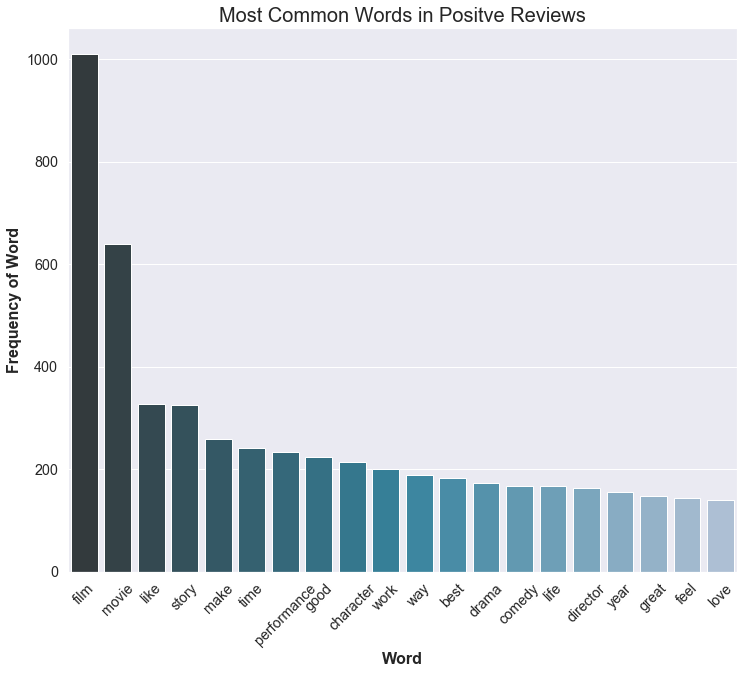

In [32]:
df_pos = new_df[df_quick["Freshness"]==1]
df_pos
X_train_counts_pos = cv.transform(df_pos["text"].values)
word_freq_pos = dict(zip(cv.get_feature_names(), np.asarray(X_train_counts_pos.sum(axis=0)).ravel()))
word_counter_pos = Counter(word_freq_pos)
word_counter_df_pos = pd.DataFrame(word_counter_pos.most_common(20), columns = ['word', 'freq'])
df_neg = new_df[df_quick["Freshness"]==0]
X_train_counts_neg = cv.transform(df_neg["text"].values)
word_freq_neg = dict(zip(count_vect.get_feature_names(), np.asarray(X_train_counts_neg.sum(axis=0)).ravel()))
word_counter_neg = Counter(word_freq_neg)
word_counter_df_neg = pd.DataFrame(word_counter_neg.most_common(20), columns = ['word', 'freq'])

fig, ax = plt.subplots(figsize=(12, 10))
#plt.subplot(1,2,1)
sns.barplot(x="word", y="freq", data=word_counter_df_pos, palette="PuBuGn_d", ax=ax)
#plt.subplot(1,2,2)
#ax[0,1]= sns.barplot(x="word", y="freq", data=word_counter_df_neg, palette="PuBuGn_d", ax=ax)
plt.xlabel("Word", fontsize=16, fontweight ="bold")
plt.ylabel("Frequency of Word",fontsize = 16,fontweight="bold")
plt.xticks(rotation=45)
plt.title("Most Common Words in Positve Reviews",fontsize=20)
plt.savefig("images/most_common_words_pos")
plt.show();

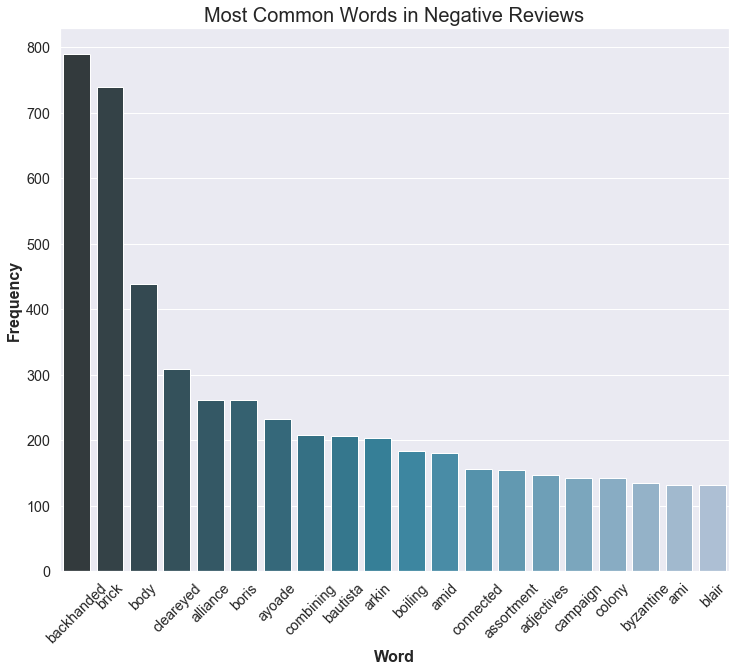

In [33]:
fig, ax = plt.subplots(figsize=(12, 10))
#plt.subplot(1,2,1)
sns.barplot(x="word", y="freq", data=word_counter_df_neg, palette="PuBuGn_d", ax=ax)
#plt.subplot(1,2,2)
#ax[0,1]= sns.barplot(x="word", y="freq", data=word_counter_df_neg, palette="PuBuGn_d", ax=ax)
plt.xticks(rotation=45)
plt.xlabel("Word",fontsize =16, fontweight="bold")
plt.ylabel("Frequency",fontsize =16, fontweight="bold")
plt.title("Most Common Words in Negative Reviews",fontsize=20)
plt.savefig("images/most_common_words_neg")
plt.show();

In [34]:
from os import path
#from PIL import image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

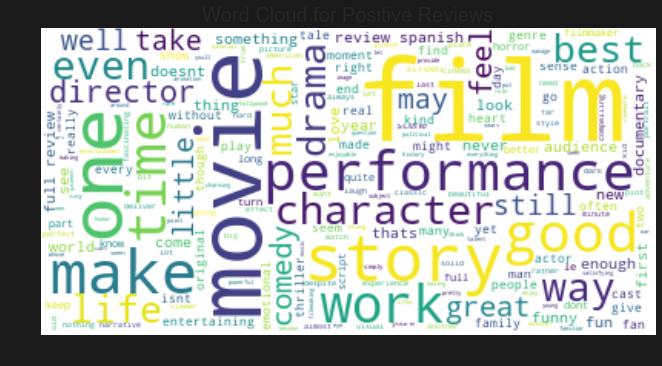

In [35]:
df_pos.head()
temp = df_pos["text"].values
text= " ".join(review for review in temp)
stopwords = set(STOPWORDS)
wordcloud =WordCloud(stopwords=stopwords, background_color="white").generate(text)
fig = plt.figure(figsize = (9,6),facecolor="k")
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("Word Cloud for Positive Reviews", fontsize=20)
plt.savefig("images/word_cloud.png")
plt.show()

In [36]:
from sklearn.naive_bayes import MultinomialNB

In [37]:
# print('\nTraining a Naive Bayes model.')
nb_model = MultinomialNB(alpha=1.0, fit_prior=False, class_prior=None)
y=df_quick["Freshness"].values
nb_model.fit(X_train_tfidf_arr, y)
type(X_train_tfidf_arr)

numpy.ndarray

In [38]:
df_test = df[40000:42500]
y_test = df_test["Freshness"].values
#X_test = df_test["Review"].values
df_corpus_test = df_test["Review"].str.replace(r'([^a-zA-Z\s]+?)',"")
#bag_of_words = " ".join(df_corpus)
df_corpus_test =df_corpus_test.str.lower()
docs_tokenized_test = [word_tokenize(content) for content in df_corpus_test]
docs_stop_test = [[word for word in words if word not in stop] for words in docs_tokenized_test]
docs_wordnet_test = [[wordnet.lemmatize(word) for word in words] for words in docs_stop_test]
docs_wordnet_test

[['exultant', 'comedy', 'american', 'repression', 'revolt'],
 ['moving', 'term', 'invigorating', 'conversationstarter'],
 ['bullett',
  'raja',
  'director',
  'tigmanshu',
  'dhulias',
  'commercial',
  'film',
  'yet',
  'weakest'],
 ['infinitely',
  'polar',
  'bear',
  'vivid',
  'snapshot',
  'one',
  'family',
  'surviving',
  'state',
  'chaotic',
  'affectionate',
  'imperfection',
  'time',
  'kid',
  'raising',
  'seen',
  'neglect',
  'normal'],
 ['disneypixar',
  'animation',
  'quality',
  'especially',
  'appearance',
  'human',
  'lively',
  'fantasy',
  'pack',
  'enough',
  'tropical',
  'incident',
  'vivid',
  'action',
  'pas',
  'muster'],
 ['de', 'bont', 'simply', 'reprises', 'first', 'film'],
 ['least',
  'cinematic',
  'train',
  'look',
  'pretty',
  'run',
  'track',
  'driving',
  'home',
  'symbolism',
  'people',
  'theater',
  'full',
  'content',
  'review',
  'parent',
  'violence',
  'profanity',
  'nudity',
  'etc',
  'also',
  'available'],
 ['perform

In [39]:
new_element =[]
for element in docs_wordnet_test:
    test = " ".join(element)
    new_element.append(test) 
type(new_element)
new_series_test = pd.Series(new_element)
new_series_test
col = "text"
new_df_test = pd.DataFrame(new_series_test,columns = [col])
new_df_test

text
0            exultant comedy american repression revolt
1          moving term invigorating conversationstarter
2     bullett raja director tigmanshu dhulias commer...
3     infinitely polar bear vivid snapshot one famil...
4     disneypixar animation quality especially appea...
5                    de bont simply reprises first film
6     least cinematic train look pretty run track dr...
7     performance make material human accessible mai...
8     filmmaker possessed mutation travel back time ...
9     helen mirrens commanding performance elizabeth...
10    robert zemeckiss walk breathtaking youd hope f...
11    dark shadow amusing fit spurt sure make ton mo...
12    saul dibbs foamy adaptation amanda foreman geo...
13    anders danielsen lie give compelling deepetche...
14    actor support translates screen real communion...
15    surprisingly subtle take aging changing role r...
16    arguably spin control last act overall make wi...
17    movie youll think tomik pretty sick puppy kies...
18    full insanely grand passion bloodthirsty viole...
19    movie raw ambition spirit literally reinvents ...
20    yes absolutely fun well many many thing go boo...
21    another surefire cult hit mancini take chucky ...
22    deliberately oldfashioned ww adventure shine l...
23    extraordinary magical wondrous blessedly origi...
24           w fail drama comedy unclear sequence meant
25    miss sloanes heroine driven craftiness film su...
26    facial jewellery elvis costello music cell pho...
27    film effective need equalizer line see youll find
28    lifeless bythenumbers production excruciating ...
29    predator gut slash way gory scifi mediocrity f...
...                                                 ...
2470  none dahl gift dark humor sparkling writing ev...
2471  knight cup film feel something important say m...
2472  proof positive emperor comedy clothes fact see...
2473  comedic crimer lateinthecycle tarantino retrea...
2474                             glorious new territory
2475  premise look film admittedly innovative scary ...
2476  took still shot one middle action sequence you...
2477  duff make long comparatively dostoyevskian dep...
2478  maturely written richly characterized flawless...
2479     scare quote around movie title never necessary
2480  hero iconic inertia photographed molten sky ju...
2481                            different anything came
2482               loud garish untimely romantic comedy
2483  emotionally rewarding reunion tour established...
2484  film delight aspect disappoints others deft jo...
2485  would take actual work get absolutely everythi...
2486  bad leslie dixon tapped le percent penning und...
2487  many reason treasure david lowerys new film gh...
2488  joss whedon fan wont want miss youre shakespea...
2489  watching movie like going quantum physic sympo...
2490  make cousin rachel engaging audience never qui...
2491  audacious performance veteran actor wonderful ...
2492  many moving part spinning many direction movie...
2493  fool shame fool twice shame fool thrice youre ...
2494  quarantine unavoidable american replica versio...
2495  journey function primarily hopeful story peopl...
2496  fascinating doc couple son nazi war criminal o...
2497  one film running gag despite unfolding apocaly...
2498  much movie good work undone silly unconvincing...
2499  there virtually one zion age except esteemed c...

[2500 rows x 1 columns]

In [40]:
X_test_counts = cv.transform(new_df_test.text.values)
#X_test_counts_arr = X_test_counts.toarray()
#X_test_counts_arr
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
X_test_arr = X_test_tfidf.toarray()
# #print(X_test_arr.shape)
# #X_test_std= scaler.fit_transform(X_temp)
# y_test = new_df_test["Freshness"].values
# #print(X_test_counts.shape)
# print(X_test_arr.shape)
nb_model.score(X_train_tfidf_arr,y)

0.8218

In [41]:
nb_model.score(X_test_arr, y_test)

0.726

In [42]:
ans = nb_model.predict_proba(X_test_arr)
ans

array([[0.4781963 , 0.5218037 ],
       [0.2390416 , 0.7609584 ],
       [0.80112905, 0.19887095],
       ...,
       [0.61703619, 0.38296381],
       [0.70151386, 0.29848614],
       [0.51065506, 0.48934494]])

In [43]:
y_predict = nb_model.predict(X_test_arr)
y_predict

array([1, 1, 0, ..., 0, 0, 0])

In [44]:
sum(y_predict)

1198

In [45]:
from sklearn import metrics

In [46]:
metrics.confusion_matrix(y_test, y_predict)

array([[952, 335],
       [350, 863]])

In [47]:
#false positives
false_positives = new_df_test[y_predict > y_test]
false_positives

text
8     filmmaker possessed mutation travel back time ...
25    miss sloanes heroine driven craftiness film su...
38    world war ii movie dad fall asleep watching couch
62    stepford wife terrific comedy lousy motion pic...
70    although strives thought provoking exploration...
75              doesnt wit doesnt style best bond movie
79    make original urban legend look like alfred hi...
119   story whose appeal hinge saving grace getting ...
135   youre lucky rare figure robot fighting eventually
144   woodleys solid performance cant keep adrift st...
154   new film keep original story even original lin...
172   packed cliche there nothing remotely original ...
177   spectacular failure film aesthetic make tremen...
180   even ace editor walter murch struggle give coh...
182   mccall highminded talk seems take little much ...
187   july provocative honorably independent filmmak...
192   furtive figure history know best watergate sni...
196   whole seems meander aimlessly rarely creating ...
198   pulse erudition visual kick dulled impact time...
201   smattering effective moment creepy cinematogra...
204   amid episodic muddle din done yet feel assured...
211   even look past horror flick hopelessly flawed ...
213   typical pic adherence rigid genre convention f...
219   eastwood display futility iraq war given year ...
236   problem screen adaptation young adult novelsth...
240   john carter arriving late party george lucas a...
241   exhibitionist ferrell finding another excuse e...
263     youre looking allages crowdpleaser may best bet
268   dramatic theme echo great crime movie seventy ...
273          film never really explains g came he going
...                                                 ...
2245             rare action movie suffers action scene
2246  uninspiring bland eight leaf nothing greater a...
2252  gigli pretend sophisticated comedy sex yet wri...
2261  greatest puzzle surrounding tom hank latest fo...
2267  nun predictable modern horror offering exact o...
2278  solitary act could saved film would chosen scr...
2285  like trojan horse troy built shell first glanc...
2292  cold soul imitation kaufman written directed n...
2303  lagravenese horse whisperer tendency sanitize ...
2304                          even stork must move time
2310  authentic account stressedout parenting anyone...
2319  churning secret nostakes genre thriller dirtch...
2332  long string heavyfooted sight sound gag must s...
2341  waterboy arguably sandlers enjoyable motion pi...
2369                        one big fat schmaltzy drama
2371          finale best could say well ive seen worse
2379  kibitzing parent moral wiggle room godless wor...
2381  da sweet blood jesus bold wildly uneven bloody...
2389  new ghostbusters frequently funny although mov...
2394  akin favorite american idol contestant prematu...
2405  miracle modern technology film achieves alchem...
2407  gospel according republican michael moore turn...
2422  film never transcends subject matter informati...
2432  good life stylistically ambitious heartfelt fe...
2439  movie becomes another line ageold tale man gai...
2446  potentially exceptional story told flatly unex...
2465  rendition worst flaw political deckstacking wi...
2472  proof positive emperor comedy clothes fact see...
2475  premise look film admittedly innovative scary ...
2492  many moving part spinning many direction movie...

[335 rows x 1 columns]

In [48]:
#false negatives
false_neg = new_df_test[y_predict < y_test]
false_neg

text
14    actor support translates screen real communion...
30        fairly unconvincing heart roughly right place
31    hard say whether mendes egger complement other...
32    mendes working script husbandandwife hipster d...
36    film belongs noble heritage beery dvd night ta...
50    girl played fire nearly admirable dragon tatto...
56    dont expect thriller seatedge sense thrilled r...
82    absolutely ingenious know car car movie richer...
85    computer chess open many interpretation great ...
86    thor ragnarok fun thor movie long shot still m...
88    eminem manages take think know eminem inject c...
103   movie onceoverlightliness stay one given intel...
109   story isnt complete end volume ii many heady p...
111   work painstaking part dont feel pain taken ach...
125   cloud atlas never boring tykwer wachowskis mak...
126   dear white people biggest flaw excessive ambit...
139   viggo mortensen save almost anything full revi...
153   spectre far bad likely frustrate many fan espe...
171   really want keep relationship catcher rye sacr...
195   best thing hunger game mockingjay part unconce...
197   film seems le problem idea story could dramatized
205   wondrous film kind since et extra terrestrial ...
206                           one scariest movie stream
209   michael mann foregoes pastel panache original ...
223   stewart pattinson convincing chemistry starcro...
225   feel like something dali would dreamed imbibin...
227   ang lee film show even modicum originality dir...
229   engaging thriller thoroughly satisfy genre fan...
231   interesting yet erratic truelife story could m...
233                          sure wow critic movie mass
...                                                 ...
2276  certainly fate worldtm stake say quite bit lim...
2287  entertainment cardboard weightless isnt respon...
2294  armadillo alternate scene tedium base wildly d...
2298  enough freshness documentarystyle observation ...
2306  playful riff film noir start upending every mo...
2325  john tucker must die clever enough avoid place...
2326  closest thing straightup alien remake series s...
2334  silver belle five former harlem chorus girl st...
2351  fulfills requirement genre admirably never ris...
2353  ferrells movie meaning inspired laugh sandwich...
2356  may biggest flatscreen dlp monitor city red cl...
2363  movie struggle keep momentum stall actual heis...
2373            really immersed believable world future
2375  best skull island delivers colossal big screen...
2378  spiderman homecoming improbable successfully r...
2399                       step vhs behind music series
2404  committeeengineered product designed boost fir...
2415  american teen feel like truth still stranger f...
2423   shunning random carnage horror carry final twist
2425  fullspeed ahead testosterone thing would class...
2427  director keep adroit amusing balance movie bro...
2430  draw like sore tooth one cant stop probing one...
2441  film lively invention pay however reach epic s...
2444  fun action nonsense classic rock overthetop si...
2457  car narrowly avoids becoming pixars first trul...
2467  funciona principalmente graas maneira eficaz c...
2470  none dahl gift dark humor sparkling writing ev...
2488  joss whedon fan wont want miss youre shakespea...
2498  much movie good work undone silly unconvincing...
2499  there virtually one zion age except esteemed c...

[350 rows x 1 columns]

In [49]:
X_train_counts_fp = cv.transform(false_positives["text"].values)
word_freq_fp = dict(zip(cv.get_feature_names(), np.asarray(X_train_counts_fp.sum(axis=0)).ravel()))
word_counter_fp = Counter(word_freq_fp)
word_counter_df_fp = pd.DataFrame(word_counter_fp.most_common(20), columns = ['word', 'freq'])

X_train_counts_fn = cv.transform(false_neg["text"].values)
word_freq_fn = dict(zip(count_vect.get_feature_names(), np.asarray(X_train_counts_fn.sum(axis=0)).ravel()))
word_counter_fn = Counter(word_freq_fn)
word_counter_df_fn = pd.DataFrame(word_counter_fn.most_common(20), columns = ['word', 'freq'])



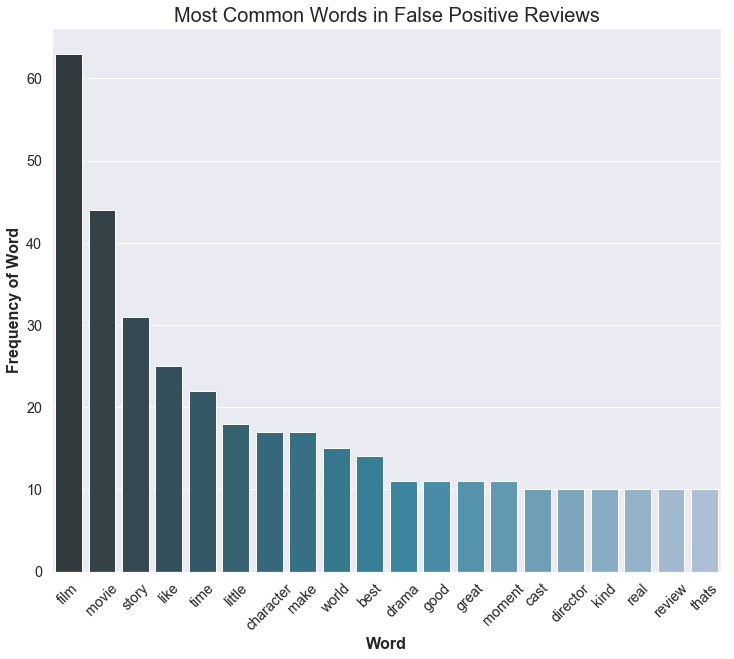

In [50]:
fig, ax = plt.subplots(figsize=(12, 10))
#plt.subplot(1,2,1)
sns.barplot(x="word", y="freq", data=word_counter_df_fp, palette="PuBuGn_d", ax=ax)
#plt.subplot(1,2,2)
#ax[0,1]= sns.barplot(x="word", y="freq", data=word_counter_df_neg, palette="PuBuGn_d", ax=ax)
plt.xlabel("Word", fontsize=16, fontweight ="bold")
plt.ylabel("Frequency of Word",fontsize = 16,fontweight="bold")
plt.xticks(rotation=45)
plt.title("Most Common Words in False Positive Reviews",fontsize=20)
plt.savefig("images/most_common_words_fp")
plt.show();

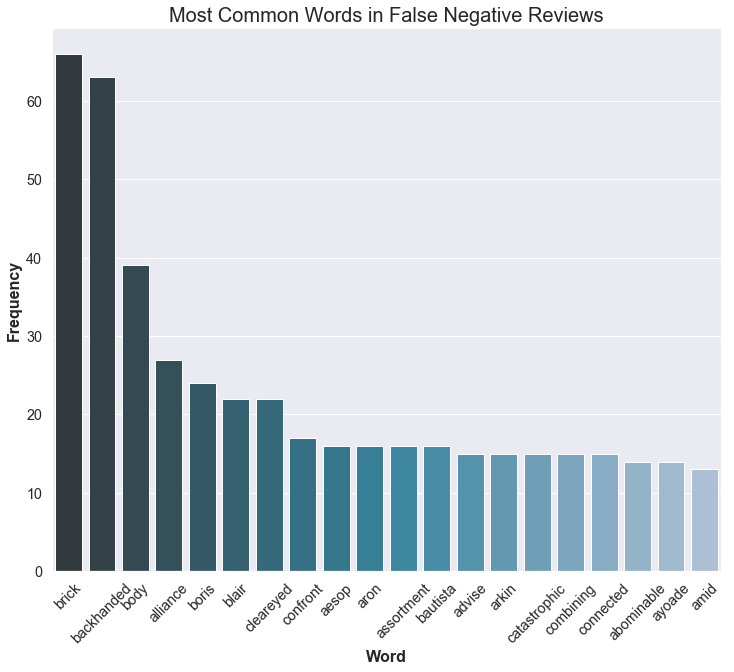

In [51]:
fig, ax = plt.subplots(figsize=(12, 10))
#plt.subplot(1,2,1)
sns.barplot(x="word", y="freq", data=word_counter_df_fn, palette="PuBuGn_d", ax=ax)
#plt.subplot(1,2,2)
#ax[0,1]= sns.barplot(x="word", y="freq", data=word_counter_df_neg, palette="PuBuGn_d", ax=ax)
plt.xticks(rotation=45)
plt.xlabel("Word",fontsize =16, fontweight="bold")
plt.ylabel("Frequency",fontsize =16, fontweight="bold")
plt.title("Most Common Words in False Negative Reviews",fontsize=20)
plt.savefig("images/most_common_words_fn")
plt.show();